In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = "monospace"
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
pd.set_option('display.max_columns', 500)

In [7]:
# Data loaded
pitchers = pd.read_csv('../all_teams_pitchers.csv')
batters = pd.read_csv('../all_teams_hitters.csv')

In [349]:
# Grabbed the columns needed to calculate Cost per War.
p = pitchers[['Player', 'Team', 'Pos', 'Payroll Salary Adjusted', 'WAR', 'Status']]
b = batters[['Player', 'Team', 'Pos', 'Payroll Salary Adjusted', 'WAR', 'Status']]
df = pd.concat([p, b]).reset_index(drop=True)

In [9]:
# Did a test to make sure the calcuations were correct.
b1 = batters.groupby('Team').agg({'Payroll Salary Adjusted': 'sum', 'WAR': 'sum'})
b1["Cost per War"] = b1["Payroll Salary Adjusted"] / b1["WAR"]
war_team = df['Payroll Salary Adjusted'].sum() / df['WAR'].sum()

In [10]:
# Aggregated to get cost per WAR for each team.
team_agg = df.groupby('Team').agg({'Payroll Salary Adjusted':'sum', 'WAR':'sum'})
# Cost per WAR calculation and created new column for it.
team_agg['Cost per War'] = team_agg['Payroll Salary Adjusted'] / team_agg['WAR']

In [11]:
team_agg_sorted = team_agg.sort_values(by="Cost per War", ascending=False)
team_agg_sorted.head()

,Payroll Salary Adjusted,WAR,Cost per War
Team,,,
CHW,74306691,10.8,6.880249e+06
TOR,112230693,16.4,6.843335e+06
TEX,145959070,24.6,5.933296e+06
NYY,259328692,44.8,5.788587e+06
LAA,72929861,14.1,5.172331e+06


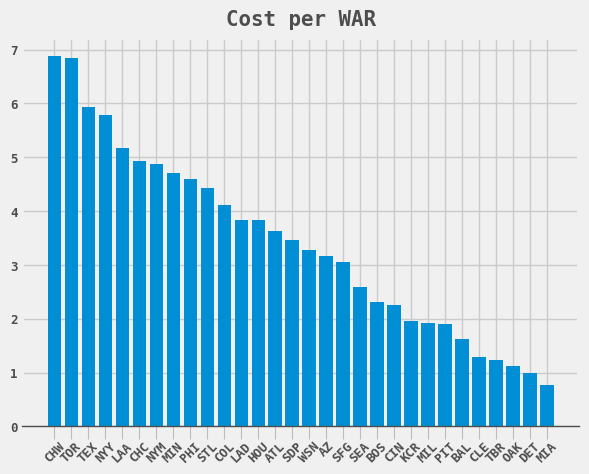

In [116]:
fig, ax = plt.subplots()

ax.bar(team_agg_sorted.index,team_agg_sorted['Cost per War'] / 1000000)

ax.set_title('Cost per WAR', fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)

plt.xticks(rotation=45, fontsize=9, color='#4d4d4d', fontweight='bold')
ax.tick_params(axis='x', length=9, color='#bdbdbd', pad=0) 

plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['bottom'].set_linewidth(1)

plt.show()

In [13]:
# WAR distribution by Position on each team
war_by_pos = df.groupby(['Team', 'Pos'])['WAR'].sum().reset_index()
war_by_pos.fillna(0, inplace=True)

In [15]:
war_by_pos.head()

,Team,Pos,WAR
0,ATL,1B,4.0
1,ATL,2B,1.8
2,ATL,3B,0.9
3,ATL,C,2.4
4,ATL,CF,3.1


In [16]:
war_heatmap_data = war_by_pos.pivot_table(index='Team', columns='Pos', values='WAR')
war_heatmap_data.fillna(0, inplace=True)

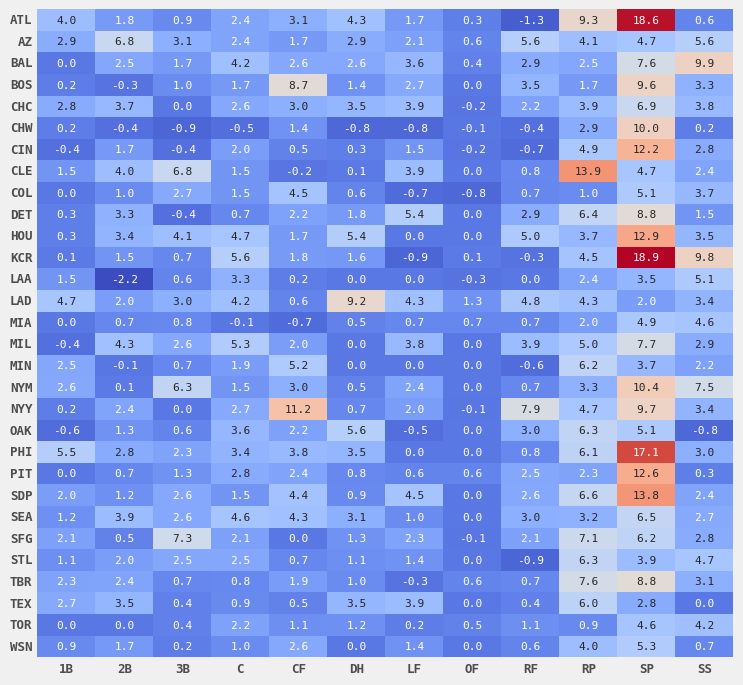

In [115]:
plt.figure(figsize=(8, 8))
sns.heatmap(war_heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", annot_kws={"fontsize": 8}, cbar=False)

ax.set_title("WAR per Position", fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)

plt.xticks(fontsize=9, color='#4d4d4d', fontweight='bold')
ax.tick_params(axis='x', length=9, color='#bdbdbd', pad=0) 

plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

plt.xlabel('')
plt.ylabel('')

ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['bottom'].set_linewidth(1)

plt.show()

In [58]:
df['Pos_Category'] = np.where(df['Pos'].isin(['SP', 'RP']), 'Pitcher', 'Hitter')

In [83]:
grouped_by_pos = df.groupby(['Team', 'Pos_Category'])['WAR'].sum().unstack()
grouped_by_pos['Total'] = grouped_by_pos['Hitter'] + grouped_by_pos['Pitcher']
grouped_by_pos_sorted = grouped_by_pos.reindex(grouped_by_pos.sort_values(by='Total', ascending=False).index)

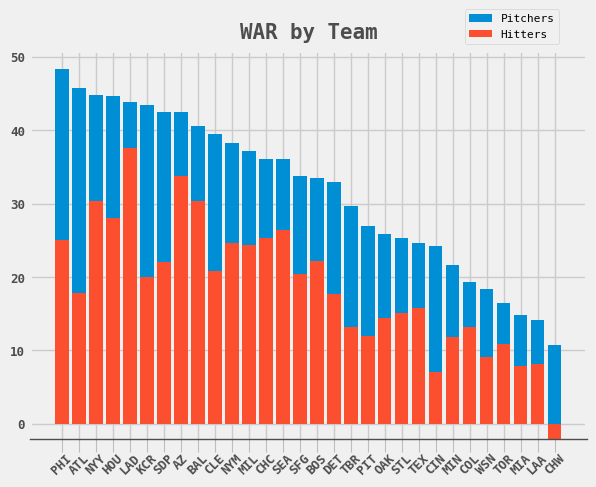

In [119]:
fig, ax = plt.subplots()

ax.bar(grouped_by_pos_sorted.index,grouped_by_pos_sorted['Pitcher'], label="Pitchers", bottom=grouped_by_pos_sorted['Hitter'])
ax.bar(grouped_by_pos_sorted.index,grouped_by_pos_sorted['Hitter'], label="Hitters")

ax.set_title('WAR by Team', fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)

plt.xticks(rotation=45, fontsize=9, color='#4d4d4d', fontweight='bold')
ax.tick_params(axis='x', length=9, color='#bdbdbd', pad=0) 

plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['bottom'].set_linewidth(1)

ax.legend(bbox_to_anchor=(.96, 1.12), loc='upper right', fontsize=8)

plt.show()

In [213]:
p2 = pitchers[['Player', 'Team', 'ERA', 'FIP']]
p_agg = p2.groupby('Team').agg({'ERA':'mean', 'FIP':'mean'})

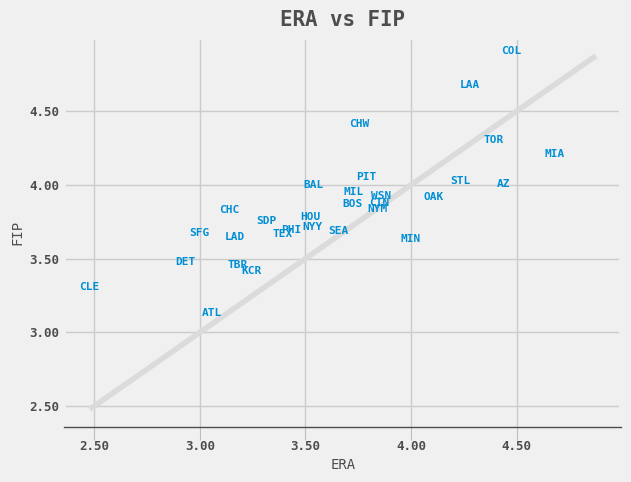

In [212]:
fig, ax = plt.subplots()

x_min = p_agg.min().min()
x_max = p_agg.max().max()

# 45 degree representing ERA = FIP
ax.plot([x_min, x_max], [x_min, x_max], color='#dbdbdb')

for team in p_agg.index:
    x = p_agg.loc[team, 'ERA']
    y = p_agg.loc[team, 'FIP']
    ax.text(x, y, team, fontsize=8, ha='center', va='bottom', color=color_pal[0], fontweight='bold')

ax.set_title('ERA vs FIP', fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)

plt.xticks(fontsize=9, color='#4d4d4d', fontweight='bold')
ax.tick_params(axis='x', length=9, color='#bdbdbd', pad=0)

# Set axis ticks formatter to display two decimal places
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['bottom'].set_linewidth(1)


plt.xlabel('ERA', fontsize=10, color='#4d4d4d')
plt.ylabel('FIP', fontsize=10, color='#4d4d4d')

plt.show()

In [350]:
age_p = pitchers[['Player', 'Age', 'Pos',  'Status', 'WAR']]
age_b = batters[['Player', 'Age', 'Pos', 'Status', 'WAR']]
age_df = pd.concat([age_p, age_b]).reset_index(drop=True)

In [351]:
age_df.head()

,Player,Age,Pos,Status,WAR
0,Sean Manaea,32,SP,Vet,3.0
1,Luis Severino,30,SP,Vet,1.6
2,Edwin Diaz,30,RP,Vet,0.5
3,Jose Quintana,35,SP,Vet,2.5
4,Adam Ottavino,38,RP,Vet,0.0


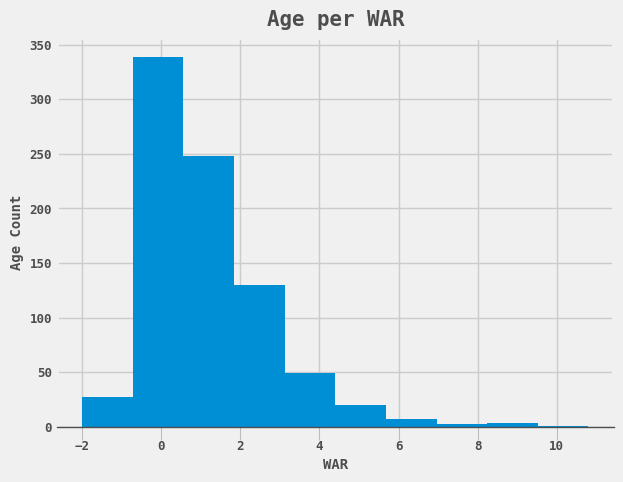

In [336]:
# Histogram of distribution of age vs war.
fig, ax = plt.subplots()

ax.hist(age_df['WAR'])

ax.set_title('Age per WAR', fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)
ax.set_xlabel('WAR', fontsize=10, color='#4d4d4d', fontweight='semibold')
ax.set_ylabel('Age Count', fontsize=10, color='#4d4d4d', fontweight='semibold')

ax.tick_params(axis='x', length=9, color='#bdbdbd', pad=0) 

plt.xticks(fontsize=9, color='#4d4d4d', fontweight='semibold')
plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['bottom'].set_linewidth(1)

plt.show()

In [292]:
ops_df = batters[['Player', 'Age', 'OPS']]
ops_df.head()

,Player,Age,OPS
0,Michael Conforto,31,0.759
1,Matt Chapman,31,0.790
2,Mike Yastrzemski,33,0.739
3,LaMonte Wade Jr.,30,0.761
4,Curt Casali,35,0.543


In [354]:
age_df['Pos_cat'] = np.where(age_df['Pos'].isin(['SP', 'RP']), 'Pitcher', 'Hitter')

In [355]:
age_df.tail()

,Player,Age,Pos,Status,WAR,Pos_cat
823,Jarred Kelenic,24,LF,Pre Arb,0.4,Hitter
824,Ramon Laureano,29,LF,Arb 3,1.3,Hitter
825,Whit Merrifield,35,2B,Vet,0.2,Hitter
826,Eli White,30,OF,Pre Arb,0.3,Hitter
827,Giovanny Urshela,32,3B,Vet,0.9,Hitter


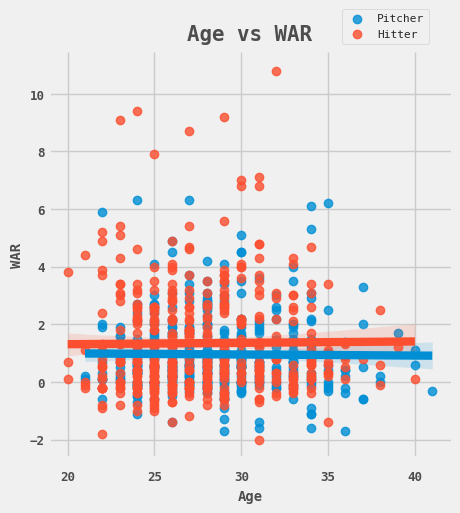

In [386]:
sns.lmplot(x='Age', y='WAR', hue='Pos_cat', data=age_df, legend=False)

plt.title("Age vs WAR", fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)
plt.xlabel('Age', fontsize=10, color='#4d4d4d', fontweight='semibold')
plt.ylabel('WAR', fontsize=10, color='#4d4d4d', fontweight='semibold')

plt.tick_params(axis='x', length=9, color='#bdbdbd', pad=0) 

plt.xticks(fontsize=9, color='#4d4d4d', fontweight='semibold')
plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

plt.legend(bbox_to_anchor=(.96, 1.12), loc='upper right', fontsize=8)

plt.show()

In [407]:
so_bb = pitchers.groupby('Team')[['SO/BB']].mean().sort_values('SO/BB', ascending=False)

In [411]:
so_bb.head()

,SO/BB
Team,
BOS,4.749286
SEA,4.162857
TBR,4.066429
TEX,4.052308
HOU,3.963077


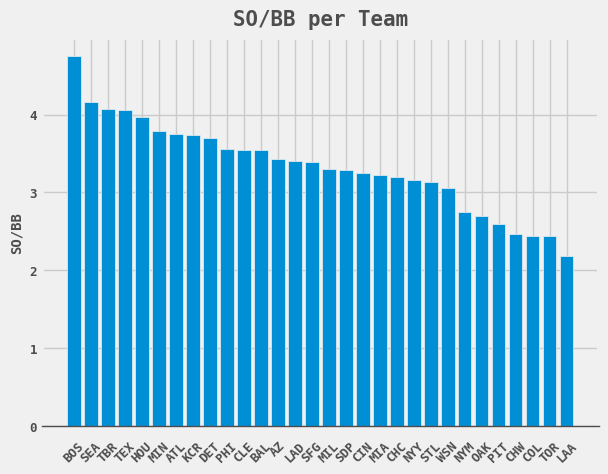

In [413]:
fig, ax = plt.subplots()

ax.bar(so_bb.index, so_bb['SO/BB'])

ax.set_title('SO/BB per Team', fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)
# ax.set_xlabel('', fontsize=10, color='#4d4d4d', fontweight='semibold')
ax.set_ylabel('SO/BB', fontsize=10, color='#4d4d4d', fontweight='semibold')

ax.tick_params(axis='x', length=9, color='#bdbdbd', pad=0)
plt.xticks(rotation=45, fontsize=9, color='#4d4d4d', fontweight='bold')

plt.xticks(fontsize=9, color='#4d4d4d', fontweight='semibold')
plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['bottom'].set_linewidth(1)